# Lab 02. Simple Linear Regression 

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

2.1.0


## Hypothesis and Cost

In [2]:
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

(0.0, 8.0)

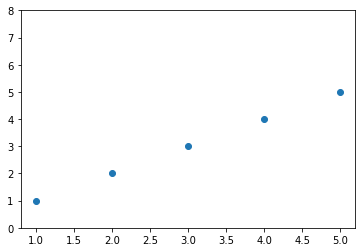

In [4]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o')
plt.ylim(0,8)

In [5]:
v =[1., 2., 3., 4.]
tf.reduce_mean(v)

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [6]:
tf.square(3)

<tf.Tensor: shape=(), dtype=int32, numpy=9>

In [7]:
W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W * x_data + b

In [8]:
W.numpy(), b.numpy()

(2.0, 0.5)

In [9]:
hypothesis.numpy()

array([ 2.5,  4.5,  6.5,  8.5, 10.5], dtype=float32)

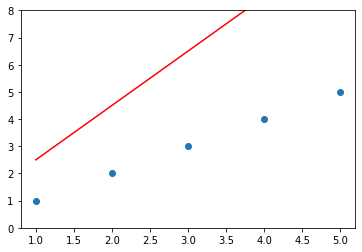

In [10]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.show()

## Cost

In [11]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [12]:
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad, b_grad = tape.gradient(cost, [W, b])
W_grad.numpy(), b_grad.numpy()

(25.0, 7.0)

## 파라미터 업데이트

In [13]:
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

W.numpy(), b.numpy()

(1.75, 0.43)

(0.0, 8.0)

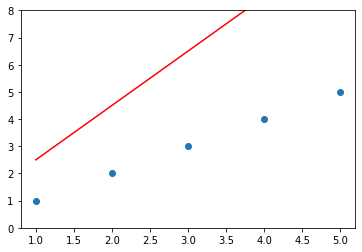

In [14]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

## 여러 번 반복

In [15]:
W = tf.Variable(2.9)       # random 값
b = tf.Variable(0.5)

for i in range(100):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W,b])
    W.assign_sub(learning_rate * W_grade)
    b.assign_sub(learning_rate * b_grade)
    
    if i % 10 == 0:
        print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i,W.numpy(), b.numpy(), cost))
        
    plt.plot(x_data, y_data, 'o')
    plt.plot(x_data, hypothesis.numpy(), 'r-')
    plt.ylim(0, 8)

NameError: name 'W_grade' is not defined

## 전체 코드

In [ ]:
import tensorflow as tf
import numpy as np

# Data
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# W, b initialize
W = tf.Variable(2.9)
b = tf.Variable(0.5)

# W, b update
for i in range(100):
    # Gradient descent
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    if i % 10 == 0:
      print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

print()

# predict
print(W * 5 + b)
print(W * 2.5 + b)